<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)

from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks, models
SEED = 42
tf.random.set_seed(SEED)

## Load the dataset

In [96]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/y_data.csv"

## Check dataset behaviour

In [97]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,-1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,-1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [98]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [99]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'IsNewCustomer',
       'IsHighCharge', 'Monthly_Tenure_Ratio', 'Total_Monthly_Ratio',
       'TotalServices', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [100]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [68]:
X.shape

(7043, 33)

In [69]:
y.shape

(7043, 1)

In [70]:
cols=[ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
       ]

if set(cols) == set(X.columns):
    print("All columns are present.")
else:
    missing = set(cols) - set(X.columns)
    extra = set(X.columns) - set(cols)
    if missing:
        print("Missing columns:", missing)
    if extra:
        print("Extra columns:", extra)

Extra columns: {'Contract_Monthly', 'Monthly_Tenure_Ratio', 'IsNewCustomer', 'HasFiber', 'Contract_Month-to-month', 'AvgMonthlyCharge', 'TotalServices', 'Total_Monthly_Ratio', 'IsHighCharge', 'PaymentMethod_Bank transfer (automatic)', 'InternetService_DSL'}


### Split Data into Training, Validation, and Test Sets

In [101]:
X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4930, 31)
Shape of y_train: (4930, 1)
Shape of X_val: (1056, 31)
Shape of y_val: (1056, 1)
Shape of X_test: (1057, 31)
Shape of y_test: (1057, 1)


In [72]:
np.sum(y_val==1)

c:\Users\chanu\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Churn    280
dtype: int64

In [73]:
np.sum(y_val==0)

Churn    776
dtype: int64

In [102]:
# Initialize the scaler
scaler = StandardScaler()

# FIT AND TRANSFORM the training data 
X_train = scaler.fit_transform(X_train)

# TRANSFORM the test data 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [76]:
X_train[0]

array([-0.43814715, -0.96295739, -0.65086184, -1.11472828,  0.33445908,
       -0.4980904 , -0.10182582, -0.17864867, -0.17914794, -0.10933053,
        1.08149216, -0.23031519, -1.20529512,  0.50428615, -0.83650447,
        0.15846124,  1.94586941,  0.90731739,  1.12453737,  1.2628289 ,
        0.86704288, -1.11758834, -0.35455473, -0.72059725,  1.12453737,
       -0.52587133,  0.90731739, -0.51517027, -0.5647009 , -0.53152442,
       -0.52555704,  1.40735673, -0.54312331])

In [103]:
y_train = y_train.squeeze()    
y_val   = y_val.squeeze()
y_test  = y_test.squeeze()

Text(0.5, 1.0, 'Count Plot for Churn')

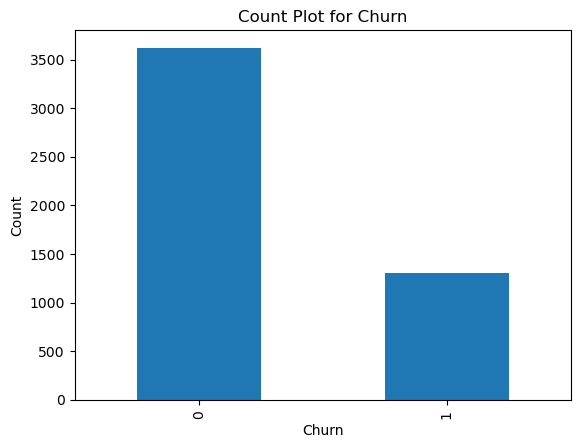

In [104]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

Text(0.5, 1.0, 'Count Plot for Churn')

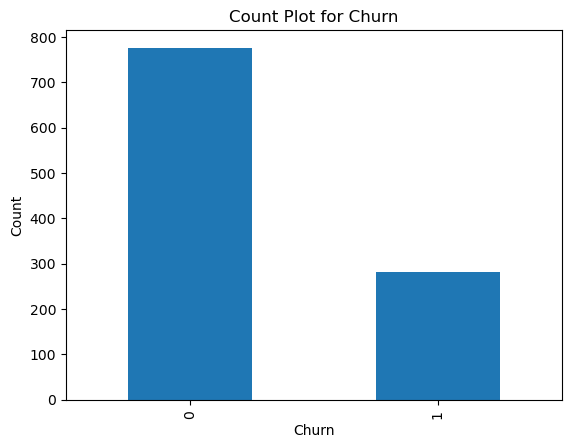

In [105]:
count=y_test.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [ ]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()


## Train Neural Network

#### Experiment 01

In [107]:
input_dim=X_train.shape[1]
input_dim

31

In [108]:
print("Final shape:", X_train.shape)

Final shape: (4930, 31)


In [109]:
len(X.columns)

31

In [ ]:
import os

set_seed=42
os.environ['PYTHONHASHSEED'] = str(set_seed)

def create_final_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
    
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build model
input_dim = X_train.shape[1]
model = create_final_model(input_dim)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(
        monitor='val_loss', patience=15, restore_best_weights=True, mode='min'
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=8, min_lr=1e-7, mode='min'
    ),
    callbacks.ModelCheckpoint(
        'best.h5', monitor='val_loss', save_best_only=True, mode='min'
    )
]

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=1024,
    callbacks=callbacks_list,
    class_weight=class_weight_dict,
    verbose=2
)

Class weights: {0: np.float64(0.680563224737714), 1: np.float64(1.8845565749235473)}
Epoch 1/200


5/5 - 2s - 472ms/step - accuracy: 0.5349 - auc: 0.5001 - loss: 0.8322 - precision: 0.2627 - recall: 0.4167 - val_accuracy: 0.4299 - val_auc: 0.5937 - val_loss: 0.7484 - val_precision: 0.2998 - val_recall: 0.8607 - learning_rate: 0.0010
Epoch 2/200


5/5 - 0s - 31ms/step - accuracy: 0.5722 - auc: 0.5809 - loss: 0.7428 - precision: 0.3131 - recall: 0.5130 - val_accuracy: 0.5284 - val_auc: 0.7039 - val_loss: 0.6942 - val_precision: 0.3443 - val_recall: 0.8607 - learning_rate: 0.0010
Epoch 3/200


5/5 - 0s - 27ms/step - accuracy: 0.6055 - auc: 0.6549 - loss: 0.6713 - precision: 0.3523 - recall: 0.5810 - val_accuracy: 0.6051 - val_auc: 0.7679 - val_loss: 0.6550 - val_precision: 0.3907 - val_recall: 0.8750 - learning_rate: 0.0010
Epoch 4/200


5/5 - 0s - 24ms/step - accuracy: 0.6389 - auc: 0.7036 - loss: 0.6332 - precision: 0.3918 - recall: 0.6537 - val_accuracy: 0.6525 - val_auc: 0.7996 - val_loss: 0.6253 - val_precision: 0.4238 - val_recall: 0.8643 - learning_rate: 0.0010
Epoch 5/200


5/5 - 0s - 34ms/step - accuracy: 0.6576 - auc: 0.7331 - loss: 0.6097 - precision: 0.4143 - recall: 0.7018 - val_accuracy: 0.6903 - val_auc: 0.8146 - val_loss: 0.6022 - val_precision: 0.4545 - val_recall: 0.8393 - learning_rate: 0.0010
Epoch 6/200


5/5 - 0s - 40ms/step - accuracy: 0.6627 - auc: 0.7460 - loss: 0.6011 - precision: 0.4199 - recall: 0.7118 - val_accuracy: 0.7074 - val_auc: 0.8228 - val_loss: 0.5835 - val_precision: 0.4705 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 7/200


5/5 - 0s - 29ms/step - accuracy: 0.6832 - auc: 0.7750 - loss: 0.5735 - precision: 0.4416 - recall: 0.7347 - val_accuracy: 0.7225 - val_auc: 0.8269 - val_loss: 0.5682 - val_precision: 0.4863 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 8/200


5/5 - 0s - 26ms/step - accuracy: 0.6917 - auc: 0.7815 - loss: 0.5653 - precision: 0.4507 - recall: 0.7408 - val_accuracy: 0.7339 - val_auc: 0.8301 - val_loss: 0.5551 - val_precision: 0.4989 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 9/200


5/5 - 0s - 34ms/step - accuracy: 0.7049 - auc: 0.7944 - loss: 0.5512 - precision: 0.4655 - recall: 0.7576 - val_accuracy: 0.7424 - val_auc: 0.8325 - val_loss: 0.5444 - val_precision: 0.5090 - val_recall: 0.8107 - learning_rate: 0.0010
Epoch 10/200


5/5 - 0s - 30ms/step - accuracy: 0.7105 - auc: 0.7961 - loss: 0.5524 - precision: 0.4710 - recall: 0.7385 - val_accuracy: 0.7472 - val_auc: 0.8341 - val_loss: 0.5349 - val_precision: 0.5148 - val_recall: 0.8071 - learning_rate: 0.0010
Epoch 11/200


5/5 - 0s - 29ms/step - accuracy: 0.7051 - auc: 0.7934 - loss: 0.5563 - precision: 0.4651 - recall: 0.7446 - val_accuracy: 0.7453 - val_auc: 0.8350 - val_loss: 0.5270 - val_precision: 0.5126 - val_recall: 0.7964 - learning_rate: 0.0010
Epoch 12/200


5/5 - 0s - 25ms/step - accuracy: 0.7215 - auc: 0.8078 - loss: 0.5377 - precision: 0.4840 - recall: 0.7500 - val_accuracy: 0.7443 - val_auc: 0.8361 - val_loss: 0.5211 - val_precision: 0.5114 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 13/200


5/5 - 0s - 30ms/step - accuracy: 0.7247 - auc: 0.8061 - loss: 0.5398 - precision: 0.4881 - recall: 0.7653 - val_accuracy: 0.7434 - val_auc: 0.8365 - val_loss: 0.5169 - val_precision: 0.5103 - val_recall: 0.7964 - learning_rate: 0.0010
Epoch 14/200


5/5 - 0s - 26ms/step - accuracy: 0.7294 - auc: 0.8096 - loss: 0.5378 - precision: 0.4936 - recall: 0.7645 - val_accuracy: 0.7453 - val_auc: 0.8376 - val_loss: 0.5135 - val_precision: 0.5126 - val_recall: 0.7964 - learning_rate: 0.0010
Epoch 15/200


5/5 - 0s - 27ms/step - accuracy: 0.7260 - auc: 0.8150 - loss: 0.5309 - precision: 0.4893 - recall: 0.7538 - val_accuracy: 0.7472 - val_auc: 0.8388 - val_loss: 0.5108 - val_precision: 0.5148 - val_recall: 0.8071 - learning_rate: 0.0010
Epoch 16/200


5/5 - 0s - 25ms/step - accuracy: 0.7213 - auc: 0.8097 - loss: 0.5368 - precision: 0.4840 - recall: 0.7615 - val_accuracy: 0.7491 - val_auc: 0.8394 - val_loss: 0.5087 - val_precision: 0.5170 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 17/200


5/5 - 0s - 30ms/step - accuracy: 0.7223 - auc: 0.8144 - loss: 0.5303 - precision: 0.4850 - recall: 0.7554 - val_accuracy: 0.7491 - val_auc: 0.8403 - val_loss: 0.5067 - val_precision: 0.5169 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 18/200


5/5 - 0s - 29ms/step - accuracy: 0.7357 - auc: 0.8217 - loss: 0.5183 - precision: 0.5012 - recall: 0.7760 - val_accuracy: 0.7462 - val_auc: 0.8411 - val_loss: 0.5045 - val_precision: 0.5135 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 19/200


5/5 - 0s - 30ms/step - accuracy: 0.7327 - auc: 0.8209 - loss: 0.5207 - precision: 0.4976 - recall: 0.7783 - val_accuracy: 0.7481 - val_auc: 0.8423 - val_loss: 0.5025 - val_precision: 0.5157 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 20/200


5/5 - 0s - 25ms/step - accuracy: 0.7252 - auc: 0.8154 - loss: 0.5268 - precision: 0.4887 - recall: 0.7745 - val_accuracy: 0.7443 - val_auc: 0.8430 - val_loss: 0.5014 - val_precision: 0.5112 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 21/200


5/5 - 0s - 44ms/step - accuracy: 0.7225 - auc: 0.8211 - loss: 0.5176 - precision: 0.4855 - recall: 0.7661 - val_accuracy: 0.7443 - val_auc: 0.8435 - val_loss: 0.5006 - val_precision: 0.5110 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 22/200


5/5 - 0s - 26ms/step - accuracy: 0.7383 - auc: 0.8260 - loss: 0.5154 - precision: 0.5044 - recall: 0.7806 - val_accuracy: 0.7424 - val_auc: 0.8438 - val_loss: 0.4994 - val_precision: 0.5088 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 23/200


5/5 - 0s - 25ms/step - accuracy: 0.7318 - auc: 0.8253 - loss: 0.5140 - precision: 0.4966 - recall: 0.7920 - val_accuracy: 0.7443 - val_auc: 0.8442 - val_loss: 0.4984 - val_precision: 0.5110 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 24/200


5/5 - 0s - 27ms/step - accuracy: 0.7394 - auc: 0.8261 - loss: 0.5161 - precision: 0.5056 - recall: 0.7959 - val_accuracy: 0.7424 - val_auc: 0.8445 - val_loss: 0.4976 - val_precision: 0.5088 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 25/200


5/5 - 0s - 27ms/step - accuracy: 0.7371 - auc: 0.8280 - loss: 0.5101 - precision: 0.5029 - recall: 0.7859 - val_accuracy: 0.7415 - val_auc: 0.8447 - val_loss: 0.4968 - val_precision: 0.5077 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 26/200


5/5 - 0s - 29ms/step - accuracy: 0.7320 - auc: 0.8258 - loss: 0.5151 - precision: 0.4968 - recall: 0.7752 - val_accuracy: 0.7405 - val_auc: 0.8448 - val_loss: 0.4968 - val_precision: 0.5066 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 27/200


5/5 - 0s - 24ms/step - accuracy: 0.7345 - auc: 0.8275 - loss: 0.5109 - precision: 0.4998 - recall: 0.7959 - val_accuracy: 0.7415 - val_auc: 0.8449 - val_loss: 0.4964 - val_precision: 0.5077 - val_recall: 0.8286 - learning_rate: 0.0010
Epoch 28/200
5/5 - 0s - 24ms/step - accuracy: 0.7316 - auc: 0.8239 - loss: 0.5189 - precision: 0.4964 - recall: 0.7859 - val_accuracy: 0.7434 - val_auc: 0.8451 - val_loss: 0.4965 - val_precision: 0.5099 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 29/200


5/5 - 0s - 24ms/step - accuracy: 0.7381 - auc: 0.8311 - loss: 0.5058 - precision: 0.5041 - recall: 0.7959 - val_accuracy: 0.7415 - val_auc: 0.8453 - val_loss: 0.4961 - val_precision: 0.5077 - val_recall: 0.8250 - learning_rate: 0.0010
Epoch 30/200


5/5 - 0s - 27ms/step - accuracy: 0.7363 - auc: 0.8334 - loss: 0.5025 - precision: 0.5019 - recall: 0.7936 - val_accuracy: 0.7415 - val_auc: 0.8458 - val_loss: 0.4952 - val_precision: 0.5077 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 31/200


5/5 - 0s - 37ms/step - accuracy: 0.7341 - auc: 0.8312 - loss: 0.5024 - precision: 0.4993 - recall: 0.7982 - val_accuracy: 0.7415 - val_auc: 0.8458 - val_loss: 0.4939 - val_precision: 0.5077 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 32/200


5/5 - 0s - 25ms/step - accuracy: 0.7383 - auc: 0.8301 - loss: 0.5090 - precision: 0.5043 - recall: 0.7997 - val_accuracy: 0.7424 - val_auc: 0.8460 - val_loss: 0.4932 - val_precision: 0.5088 - val_recall: 0.8214 - learning_rate: 0.0010
Epoch 33/200


5/5 - 0s - 28ms/step - accuracy: 0.7377 - auc: 0.8295 - loss: 0.5099 - precision: 0.5037 - recall: 0.7859 - val_accuracy: 0.7424 - val_auc: 0.8460 - val_loss: 0.4930 - val_precision: 0.5089 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 34/200
5/5 - 0s - 25ms/step - accuracy: 0.7406 - auc: 0.8378 - loss: 0.4993 - precision: 0.5071 - recall: 0.7867 - val_accuracy: 0.7424 - val_auc: 0.8460 - val_loss: 0.4935 - val_precision: 0.5089 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 35/200
5/5 - 0s - 20ms/step - accuracy: 0.7444 - auc: 0.8374 - loss: 0.4976 - precision: 0.5117 - recall: 0.8020 - val_accuracy: 0.7405 - val_auc: 0.8459 - val_loss: 0.4934 - val_precision: 0.5066 - val_recall: 0.8179 - learning_rate: 0.0010
Epoch 36/200
5/5 - 0s - 20ms/step - accuracy: 0.7402 - auc: 0.8316 - loss: 0.5079 - precision: 0.5066 - recall: 0.7882 - val_accuracy: 0.7405 - val_auc: 0.8463 - val_loss: 0.4936 - val_precision: 0.5067 - val_recall: 0.8143 - learning_rate: 0.0010
Epoch 37/200
5/5 - 0s

5/5 - 0s - 22ms/step - accuracy: 0.7493 - auc: 0.8391 - loss: 0.4975 - precision: 0.5178 - recall: 0.7989 - val_accuracy: 0.7405 - val_auc: 0.8465 - val_loss: 0.4926 - val_precision: 0.5066 - val_recall: 0.8179 - learning_rate: 5.0000e-04
Epoch 46/200


5/5 - 0s - 26ms/step - accuracy: 0.7355 - auc: 0.8374 - loss: 0.4948 - precision: 0.5010 - recall: 0.7798 - val_accuracy: 0.7405 - val_auc: 0.8464 - val_loss: 0.4926 - val_precision: 0.5066 - val_recall: 0.8179 - learning_rate: 5.0000e-04
Epoch 47/200


5/5 - 0s - 70ms/step - accuracy: 0.7475 - auc: 0.8400 - loss: 0.4944 - precision: 0.5156 - recall: 0.7974 - val_accuracy: 0.7396 - val_auc: 0.8466 - val_loss: 0.4925 - val_precision: 0.5055 - val_recall: 0.8179 - learning_rate: 5.0000e-04
Epoch 48/200
5/5 - 0s - 20ms/step - accuracy: 0.7448 - auc: 0.8368 - loss: 0.4999 - precision: 0.5123 - recall: 0.7989 - val_accuracy: 0.7405 - val_auc: 0.8466 - val_loss: 0.4926 - val_precision: 0.5066 - val_recall: 0.8179 - learning_rate: 5.0000e-04
Epoch 49/200
5/5 - 0s - 21ms/step - accuracy: 0.7473 - auc: 0.8358 - loss: 0.5014 - precision: 0.5155 - recall: 0.7905 - val_accuracy: 0.7405 - val_auc: 0.8469 - val_loss: 0.4933 - val_precision: 0.5066 - val_recall: 0.8179 - learning_rate: 5.0000e-04
Epoch 50/200
5/5 - 0s - 22ms/step - accuracy: 0.7460 - auc: 0.8313 - loss: 0.5066 - precision: 0.5140 - recall: 0.7844 - val_accuracy: 0.7396 - val_auc: 0.8469 - val_loss: 0.4938 - val_precision: 0.5055 - val_recall: 0.8179 - learning_rate: 5.0000e-04
Epoch

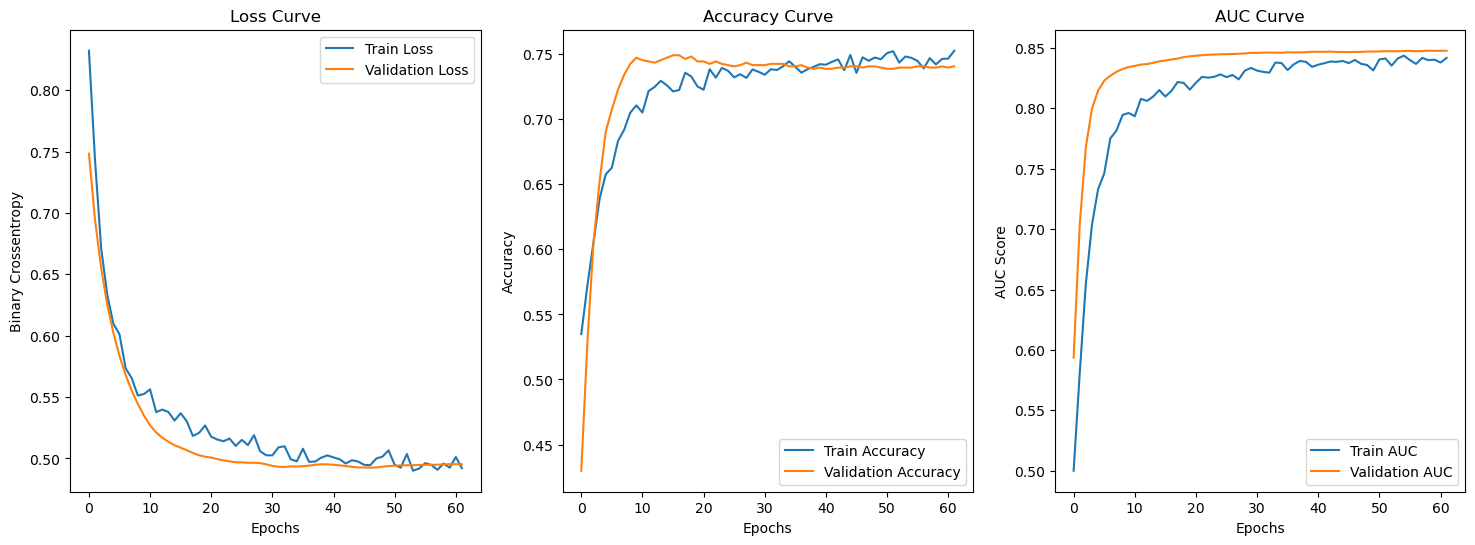

In [119]:
plot_history(history)

In [143]:
best_model_2 = keras.models.load_model('best.h5')
test_results = best_model_2.evaluate(X_test, y_test, verbose=0)

test_loss     = test_results[0]
test_auc      = test_results[1]
test_accuracy = test_results[2]
test_precision = test_results[3]
test_recall    = test_results[4]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, (model.predict(X_test) >= 0.62).astype(int)))

train_accuracy = history.history['accuracy'][-1]
val_accuracy   = history.history['val_accuracy']
train_loss     = history.history['loss']
val_loss       = history.history['val_loss']
train_auc= roc_auc_score(y_train, best_model_2.predict(X_train))

train_precision = history.history['precision'][-1]
train_recall = history.history['recall'][-1]

print(" Training Accuracy:", train_accuracy)
print(" Validation Accuracy:", val_accuracy[-1])
print(" Training Loss:", train_loss[-1])
print(" Validation Loss:", val_loss[-1])
print(" Train AUC:", train_auc)
print(" Train Precision:", train_precision)
print(" Train Recall:", train_recall)

Test Loss: 0.4691
Test AUC: 0.7512
Test Accuracy: 0.8483
Test Precision: 0.5215
Test Recall: 0.7758

Classification Report:
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       776
           1       0.62      0.62      0.62       281

    accuracy                           0.80      1057
   macro avg       0.74      0.74      0.74      1057
weighted avg       0.80      0.80      0.80      1057

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
 Training Accuracy: 0.7525355219841003
 Validation Accuracy: 0.7405303120613098
 Training Loss: 0.49208325147628784
 Validation Loss: 0.49518775939941406
 Train AUC: 0.8582931440044446
 Train Precision: 0.5216109752655029
 Train Recall: 0.8119266033172607


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: >

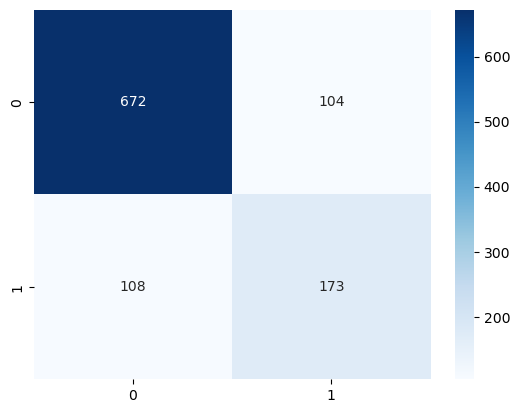

In [148]:
cm=confusion_matrix(y_test, (best_model_2.predict(X_test) >= 0.62).astype(int))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


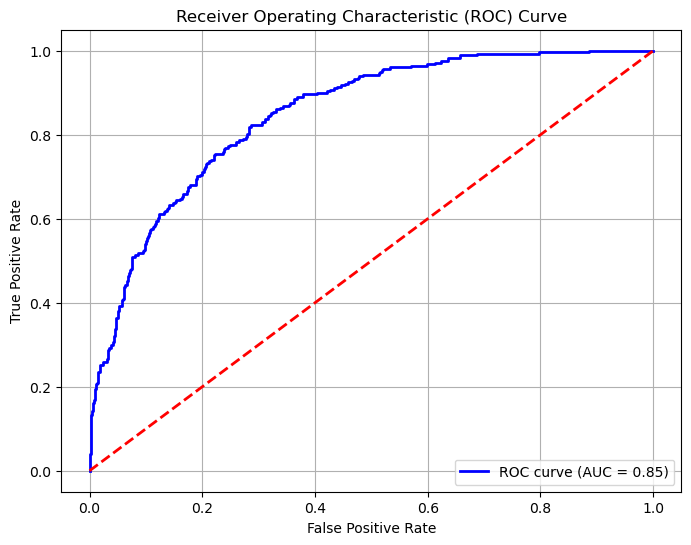

In [149]:
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

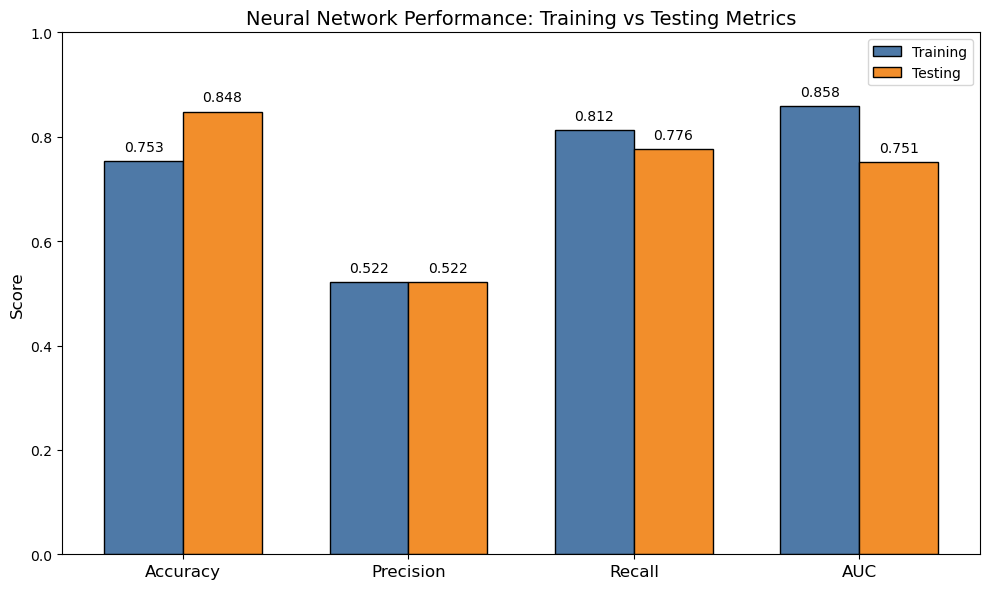

In [150]:
import numpy as np
import matplotlib.pyplot as plt

 
metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']

train_values = [train_accuracy, train_precision, train_recall, train_auc]
test_values  = [test_accuracy, test_precision, test_recall, test_auc]

 
x = np.arange(len(metrics))
width = 0.35

 
plt.figure(figsize=(10,6))

plt.bar(x - width/2, train_values, width,
        label='Training', color='#4E79A7', edgecolor='black')     # navy blue

plt.bar(x + width/2, test_values, width,
        label='Testing', color='#F28E2B', edgecolor='black')      # orange

# --- Labels ---
plt.xticks(x, metrics, fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Neural Network Performance: Training vs Testing Metrics", fontsize=14)
plt.ylim(0, 1)
plt.legend()

# --- Display values on bars ---
for i, v in enumerate(train_values):
    plt.text(i - width/2, v + 0.02, f"{v:.3f}", ha='center')

for i, v in enumerate(test_values):
    plt.text(i + width/2, v + 0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()
